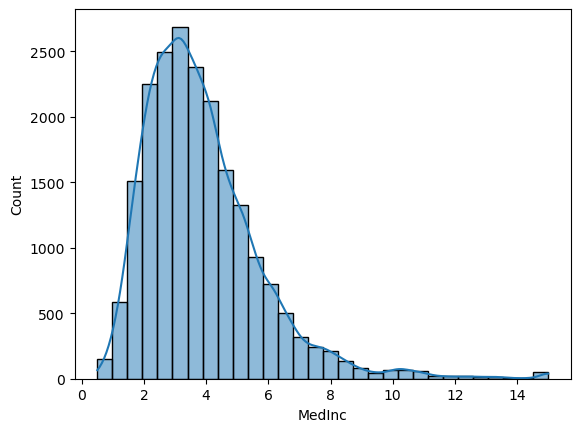

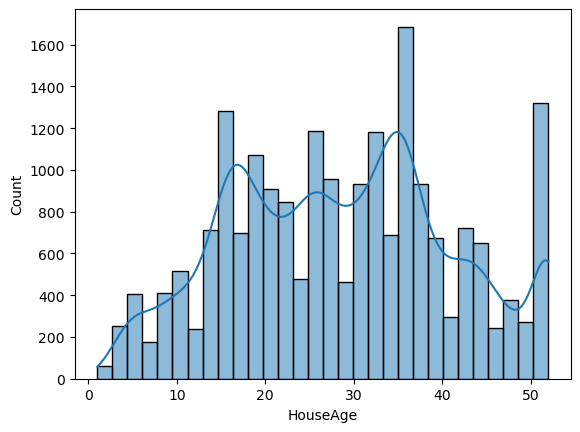

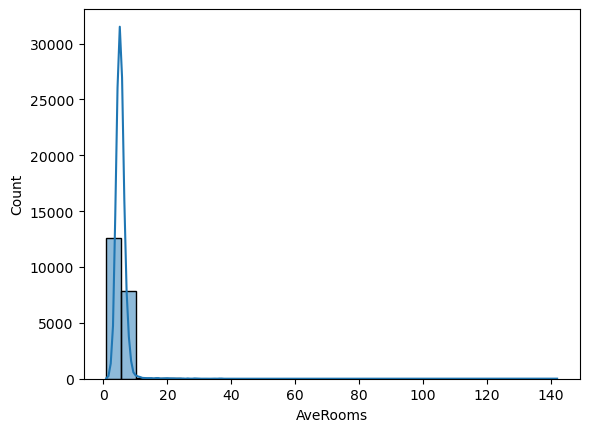

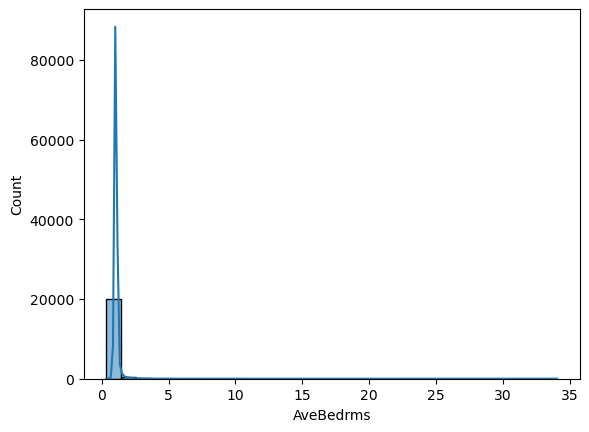

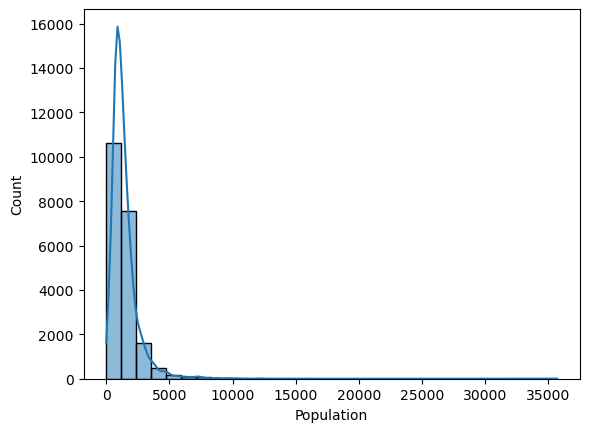

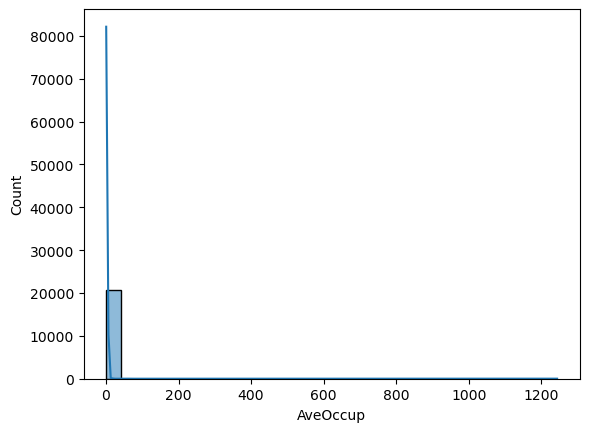

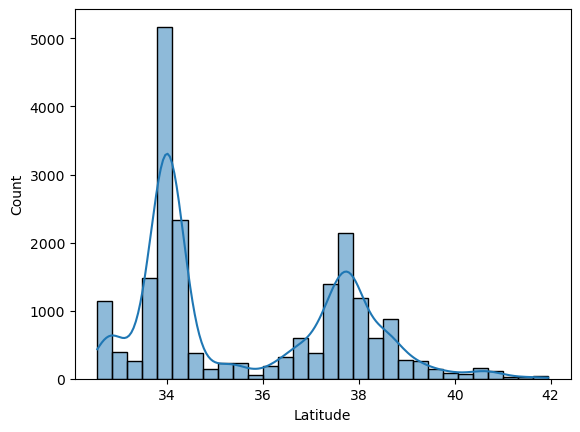

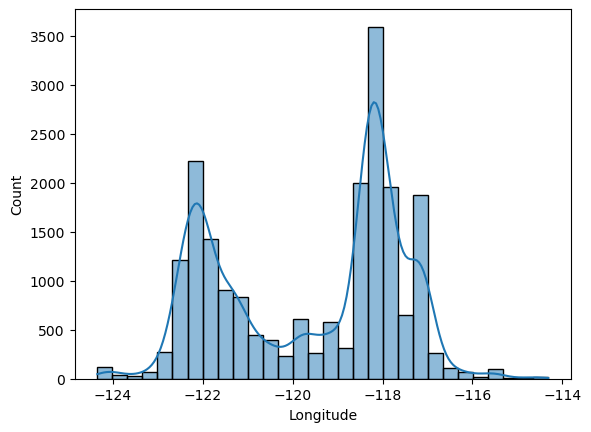

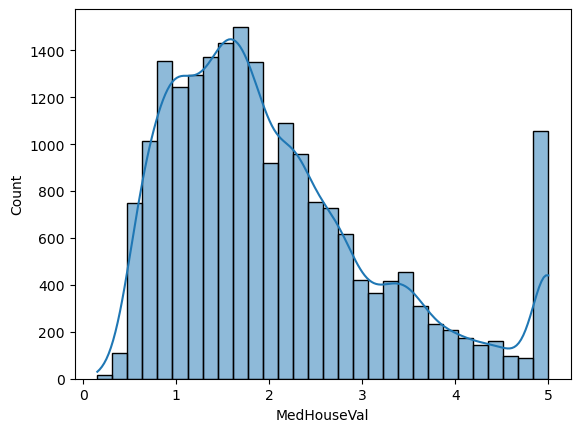

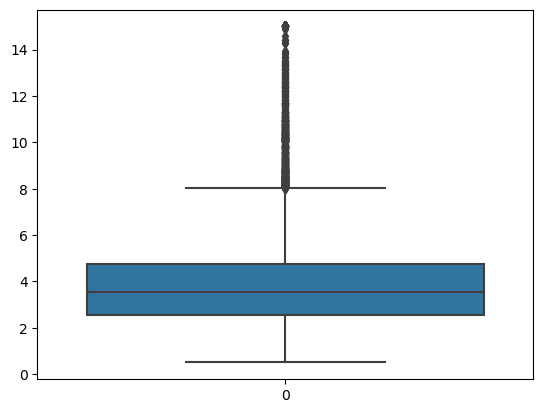

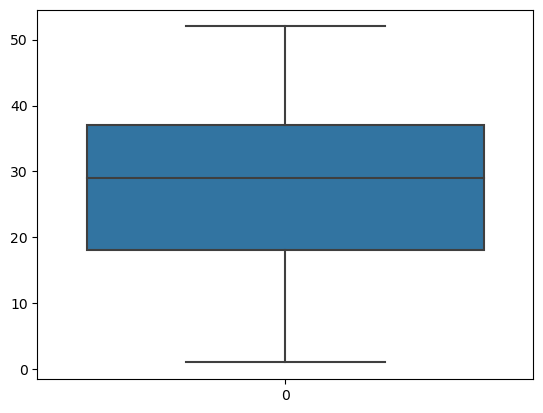

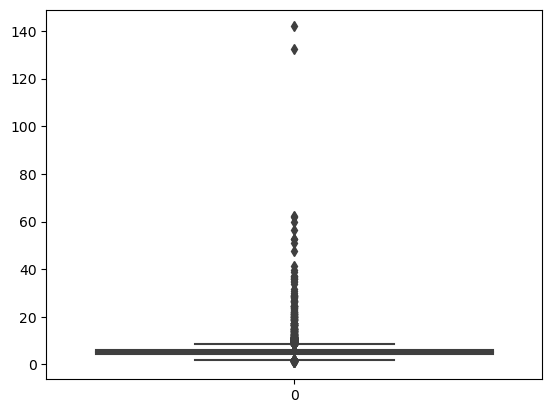

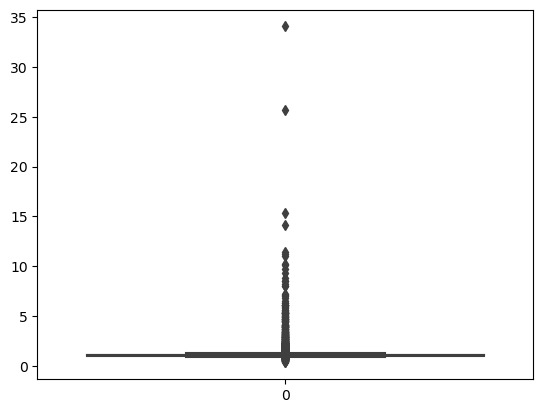

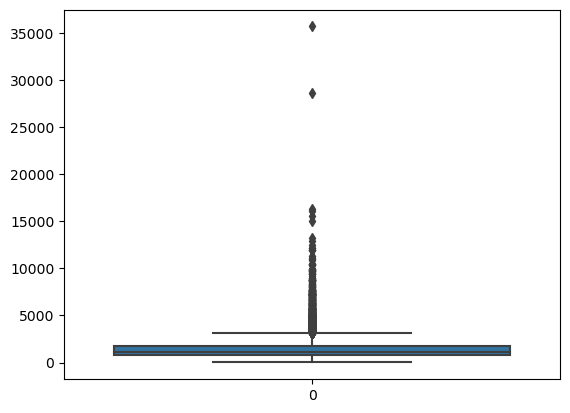

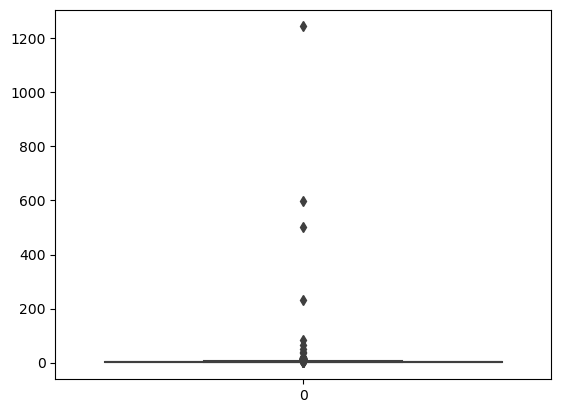

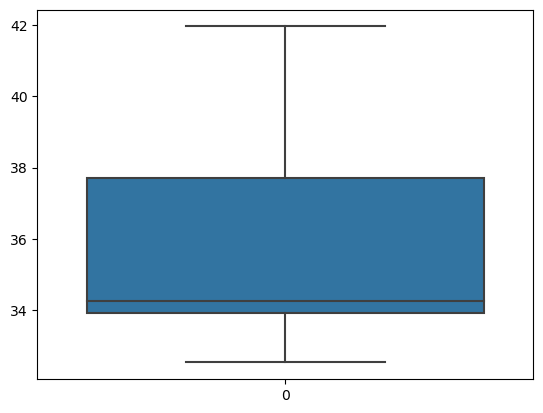

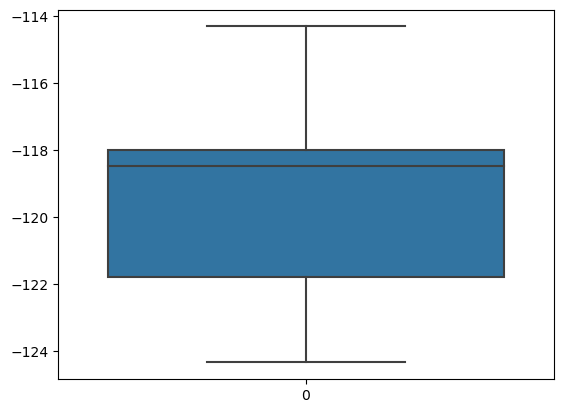

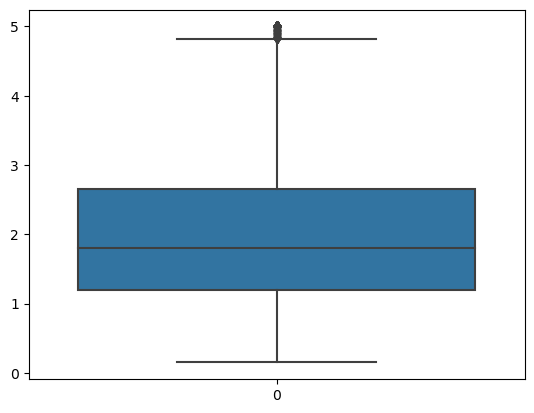

summary
MedInc:681
HouseAge:0
AveRooms:511
AveBedrms:1424
Population:1196
AveOccup:711
Latitude:0
Longitude:0
MedHouseVal:1071


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

data=fetch_california_housing(as_frame=True)
df=data.frame

nf=df.select_dtypes(include=[np.number]).columns

for i,f in enumerate(nf):
    sns.histplot(df[f],kde=True,bins=30)
    plt.show()
    
for i,f in enumerate(nf):
    sns.boxplot(df[f])
    plt.show()

print("summary")
for f in nf:
    q1=df[f].quantile(0.25)
    q3=df[f].quantile(0.75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    outlier=df[(df[f]<lb) | (df[f]>ub)]
    print(f'{f}:{len(outlier)}')

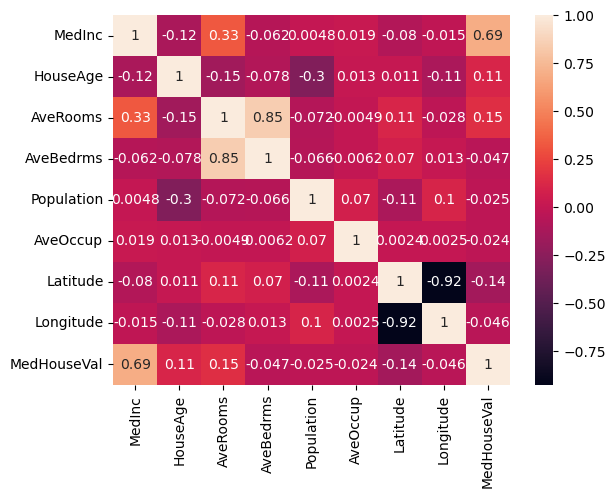

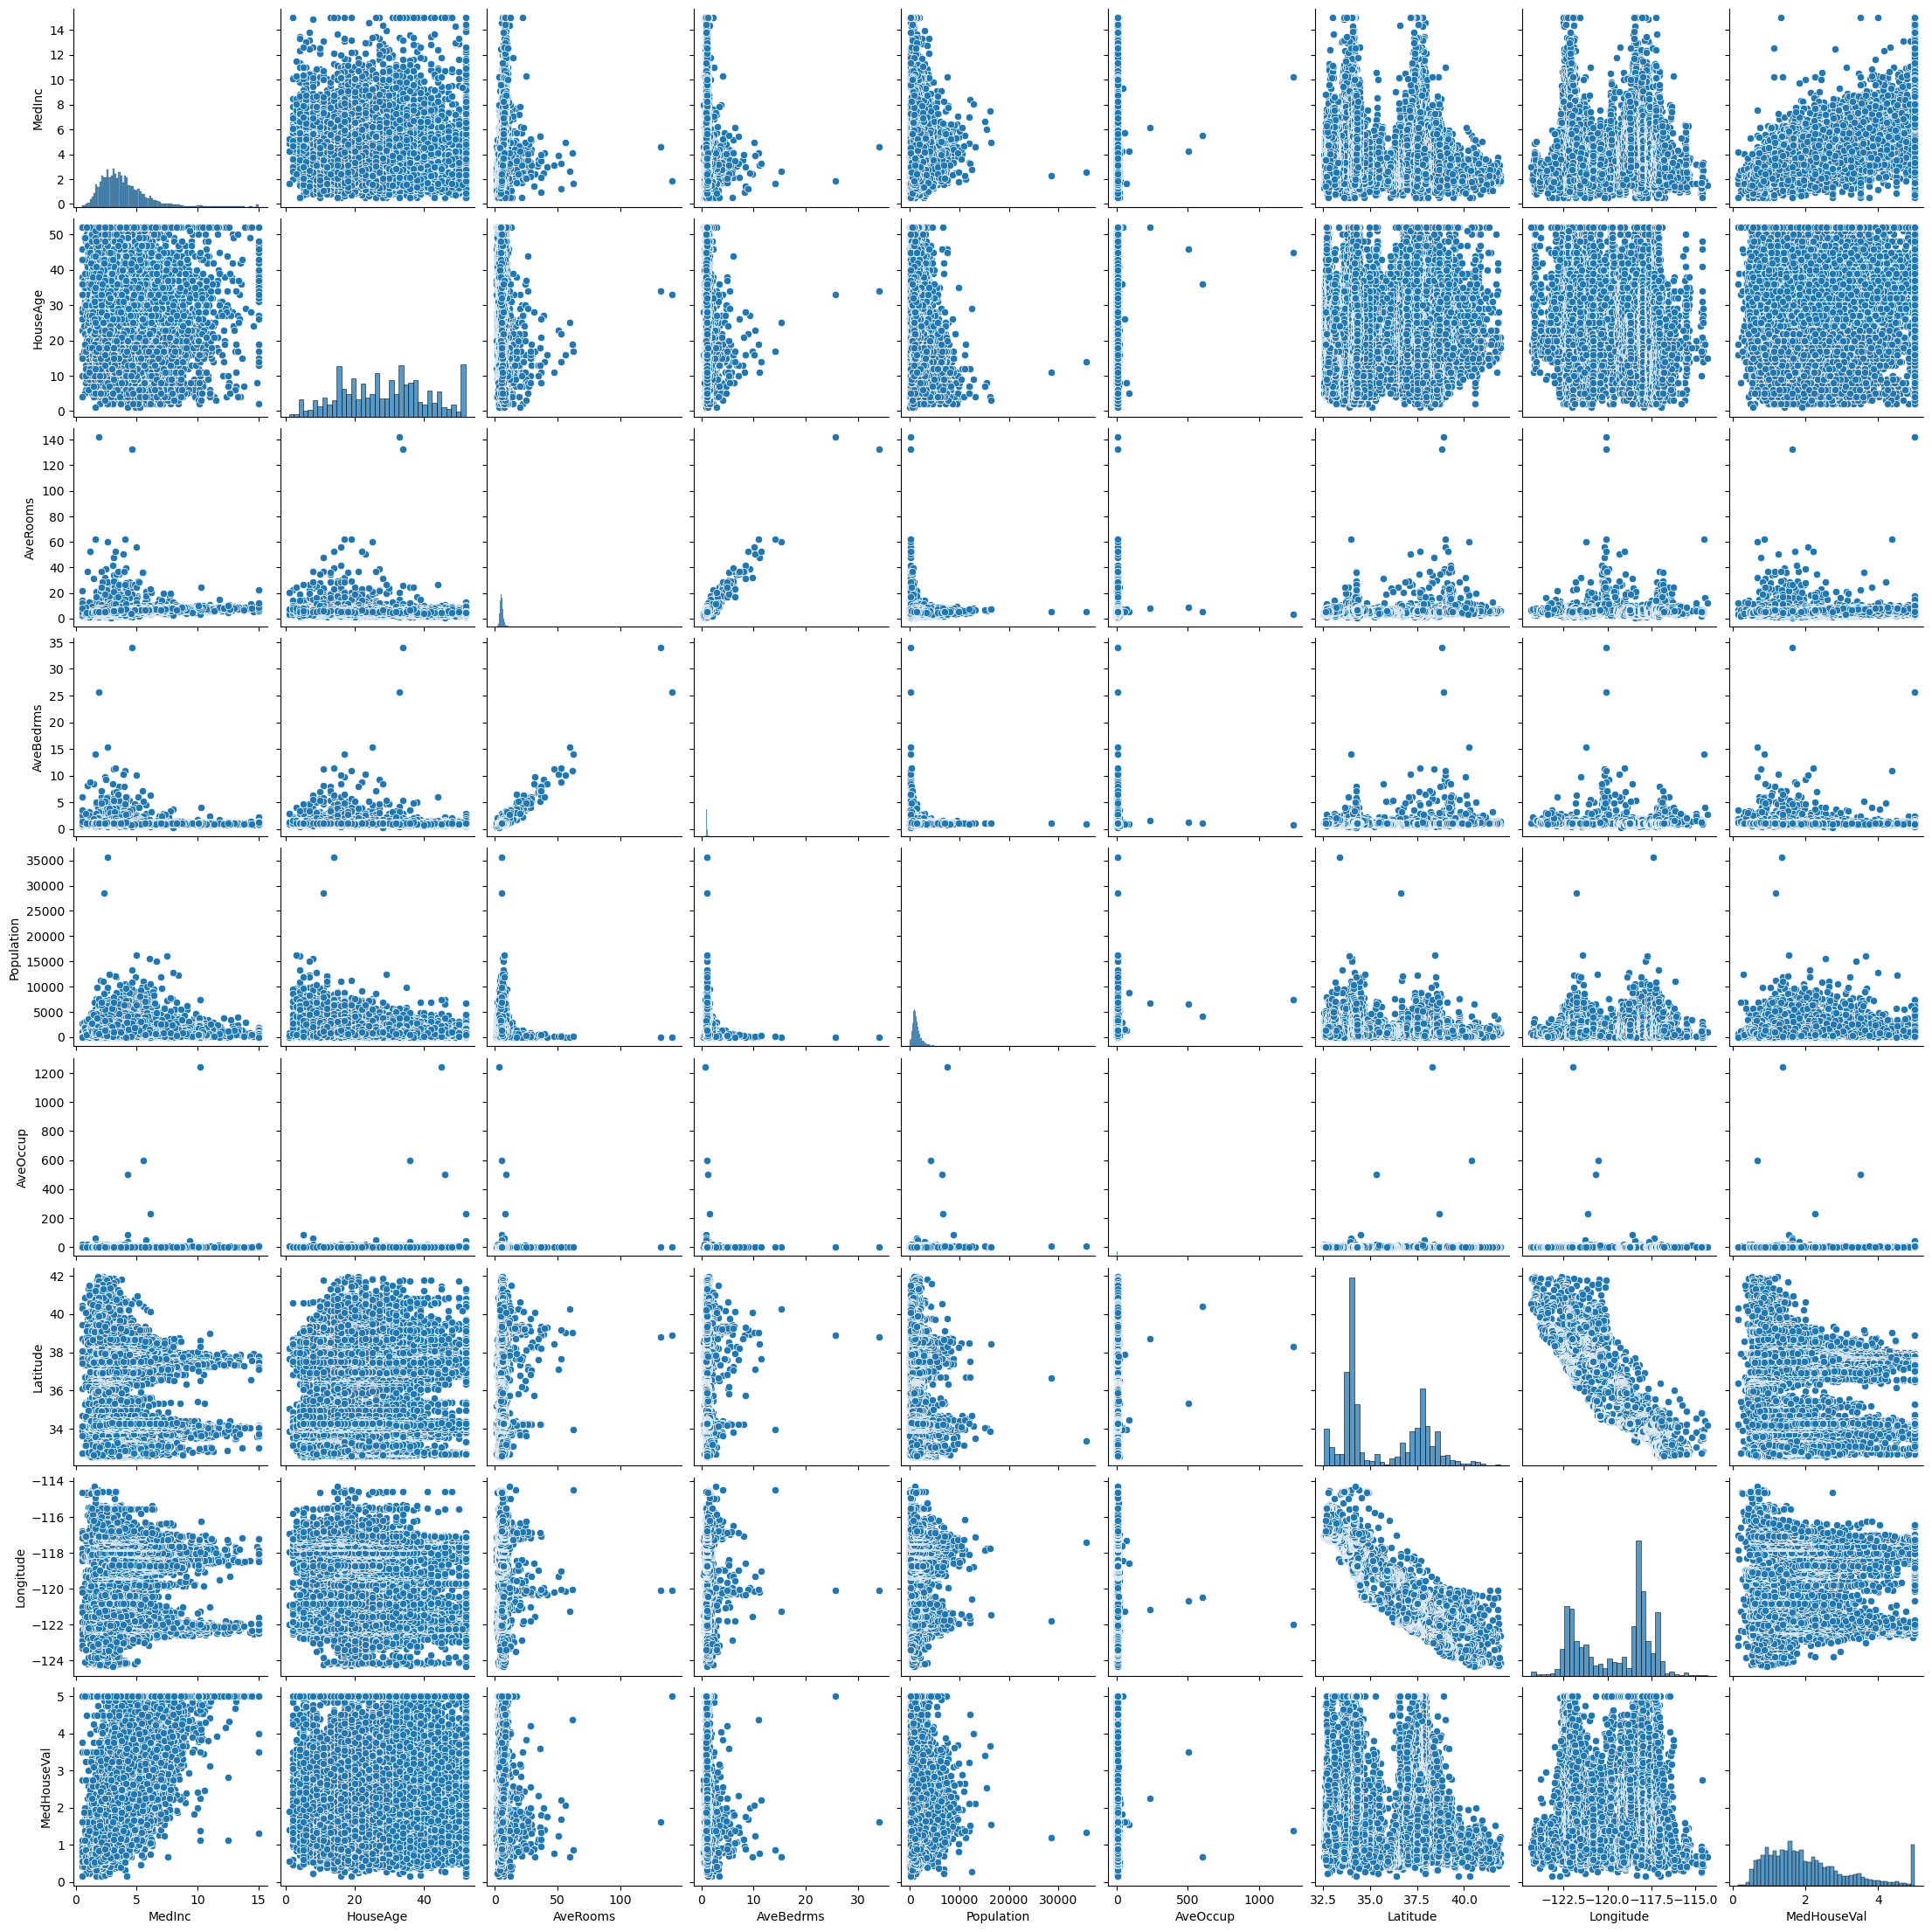

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

data=fetch_california_housing(as_frame=True)
df=data.frame

corrmat=df.corr()

sns.heatmap(corrmat,annot=True)
plt.show()

sns.pairplot(df)
plt.show()

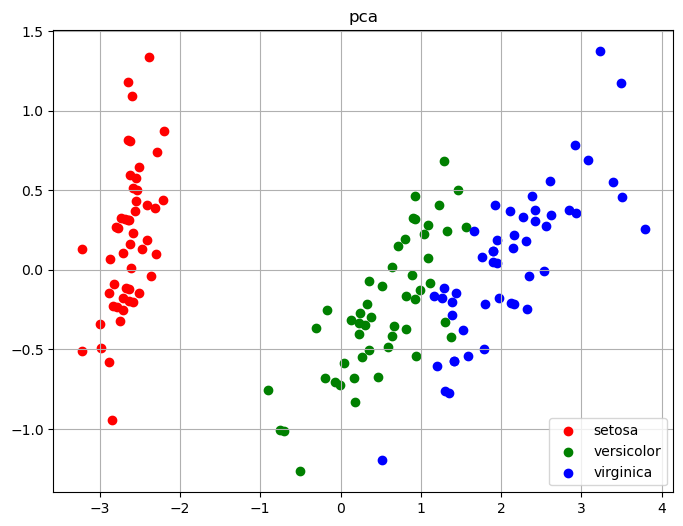

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris=load_iris()
data=iris.data
labels=iris.target
label_names=iris.target_names

pca=PCA(n_components=2)
data_r=pca.fit_transform(data)
df_r=pd.DataFrame(data_r,columns=['PCA1','PCA2'])
df_r['label']=labels

plt.figure(figsize=(8,6))
colors=['r','g','b']
for i,label in enumerate(np.unique(labels)):
    plt.scatter(df_r[df_r['label']==label]['PCA1'],df_r[df_r['label']==label]['PCA2'],label=label_names[label],color=colors[i])
plt.title("pca")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np 
import pandas as pd 
data=pd.read_csv('finds.csv') 
print('Data',data) 
def train(concepts,target): 
        specific_h=concepts[0] 
        print('\nspecific1\n',specific_h) 
        for i,h in enumerate(concepts): 
            print('i',i) 
            print('h',h) 
            if target[i]=="Yes": 
                for x in range(len(specific_h)): 
                    print('x',x) 
                    print('specific',specific_h) 
                    if h[x]==specific_h[x]: 
                        pass 
                    else: 
                        specific_h[x]="?" 
        return specific_h 
concepts=np.array(data.iloc[:,0:-1]) 
target=np.array(data.iloc[:,-1]) 
print('\nConcept\n',concepts) 
print('Target',target) 
print(train(concepts,target))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Generate random data
data = np.random.rand(100)  # 100 random values between 0 and 1

# Step 2: Assign labels to the first 50 points (training data)
train_data = data[:50]
train_labels = ["Class1" if x <= 0.5 else "Class2" for x in train_data]

# Step 3: Remaining 50 points are test data
test_data = data[50:]

# Step 4: Define Euclidean distance function (for 1D it's just abs difference)
def euclidean_distance(x1, x2):
    return abs(x1 - x2)

# Step 5: Define the k-NN classifier
def knn_classifier(train_data, train_labels, test_point, k):
    distances = []
    for i in range(len(train_data)):
        dist = euclidean_distance(test_point, train_data[i])
        distances.append((dist, train_labels[i]))
    
    # Sort by distance and get top k
    distances.sort(key=lambda x: x[0])
    k_neighbors = distances[:k]
    
    # Get most common label among the k neighbors
    k_labels = [label for _, label in k_neighbors]
    most_common = Counter(k_labels).most_common(1)[0][0]
    
    return most_common

# Step 6: Try different k values
k_values = [1, 3, 5]

for k in k_values:
    print(f"\nResults for k = {k}:")
    classified_labels = [knn_classifier(train_data, train_labels, point, k) for point in test_data]
    
    for i, label in enumerate(classified_labels):
        print(f"Test point {i+1} (value: {test_data[i]:.4f}) → {label}")
    
    # Step 7: Plotting
    class1 = [test_data[i] for i in range(len(test_data)) if classified_labels[i] == "Class1"]
    class2 = [test_data[i] for i in range(len(test_data)) if classified_labels[i] == "Class2"]
    
    plt.figure(figsize=(8, 4))
    plt.scatter(train_data, [0]*len(train_data),
                c=["blue" if lbl == "Class1" else "red" for lbl in train_labels],
                label="Training Data", marker='o')
    
    plt.scatter(class1, [1]*len(class1), c="blue", label="Class1 (Test)", marker='x')
    plt.scatter(class2, [1]*len(class2), c="red", label="Class2 (Test)", marker='x')
    
    plt.title(f"k-NN Classification (k = {k})")
    plt.xlabel("Data Points")
    plt.ylabel("Y-Axis")
    plt.legend()
    plt.grid(True)
    plt.show()


In [11]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
 
def kernel(point,xmat, k): 
    m,n = np.shape(xmat) 
    weights = np.mat(np.eye((m))) # eye - identity matrix 
    for j in range(m): 
        diff = point - X[j] 
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2)) 
    return weights 
def localWeight(point,xmat,ymat,k): 
    wei = kernel(point,xmat,k) 
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T)) 
    return W 
 
def localWeightRegression(xmat,ymat,k): 
    m,n = np.shape(xmat) 
    ypred = np.zeros(m) 
    for i in range(m): 
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k) 
    return ypred 
 
def graphPlot(X,ypred): 
    sortindex = X[:,1].argsort(0) #argsort - index of the smallest 
    xsort = X[sortindex][:,0] 
    fig = plt.figure() 
    ax = fig.add_subplot(1,1,1) 
    ax.scatter(bill,tip, color='green') 
    ax.plot(xsort[:,1],ypred[sortindex], color = 'red', linewidth=5) 
    plt.xlabel('Total bill') 
    plt.ylabel('Tip') 
    plt.show();
# load data points 
data = pd.read_csv('Program6_dataset_tips.csv') 
bill = np.array(data.total_bill) # We use only Bill amount and Tips data 
tip = np.array(data.tip) 
mbill = np.mat(bill) # .mat will convert nd array is converted in 2D array 
mtip = np.mat(tip) 
m= np.shape(mbill)[1] 
one = np.mat(np.ones(m)) 
X = np.hstack((one.T,mbill.T)) # 244 rows, 2 cols increase k to get smooth curves 
ypred = localWeightRegression(X,mtip,9) 
graphPlot(X,ypred)

FileNotFoundError: [Errno 2] No such file or directory: 'Program6_dataset_tips.csv'

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures, 
StandardScaler 
from sklearn.pipeline import make_pipeline 
from sklearn.metrics import mean_squared_error, r2_score 
 
def linear_regression_california(): 
    housing = fetch_california_housing(as_frame=True) 
    X = housing.data[["AveRooms"]]  
    y = housing.target  
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
 
    model = LinearRegression() 
    model.fit(X_train, y_train) 
 
    y_pred = model.predict(X_test)
    
    plt.scatter(X_test, y_test, color="blue", label="Actual") 
    plt.plot(X_test, y_pred, color="red", label="Predicted") 
    plt.xlabel("Average number of rooms (AveRooms)") 
    plt.ylabel("Median value of homes ($100,000)") 
    plt.title("Linear Regression - California Housing Dataset") 
    plt.legend() 
    plt.show() 
 
    print("Linear Regression - California Housing Dataset") 
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred)) 
    print("R^2 Score:", r2_score(y_test, y_pred)) 

def polynomial_regression_auto_mpg(): 
    url = "https://archive.ics.uci.edu/ml/machine-learningdatabases/auto-mpg/auto-mpg.data" 
    column_names = ["mpg", "cylinders", "displacement", horsepower", "weight", "acceleration", "model_year", "origin"] 
    data = pd.read_csv(url, sep='\s+', names=column_names, na_values="?") 
    data = data.dropna() 
 
    X = data["displacement"].values.reshape(-1, 1)  
    y = data["mpg"].values 
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
 
    poly_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression()) 
    poly_model.fit(X_train, y_train) 
 
    y_pred = poly_model.predict(X_test) 
    plt.scatter(X_test, y_test, color="blue", label="Actual") 
    plt.scatter(X_test, y_pred, color="red", label="Predicted") 
    plt.xlabel("Displacement") 
    plt.ylabel("Miles per gallon (mpg)")

    plt.title("Polynomial Regression - Auto MPG Dataset") 
    plt.legend() 
    plt.show() 
 
    print("Polynomial Regression - Auto MPG Dataset") 
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred)) 
    print("R^2 Score:", r2_score(y_test, y_pred)) 
if __name__ == "__main__": 
    print("Demonstrating Linear Regression and Polynomial 
Regression\n") 
    linear_regression_california() 
    polynomial_regression_auto_mpg()

Model Accuracy: 94.74%
Predicted Class for the new sample: Benign


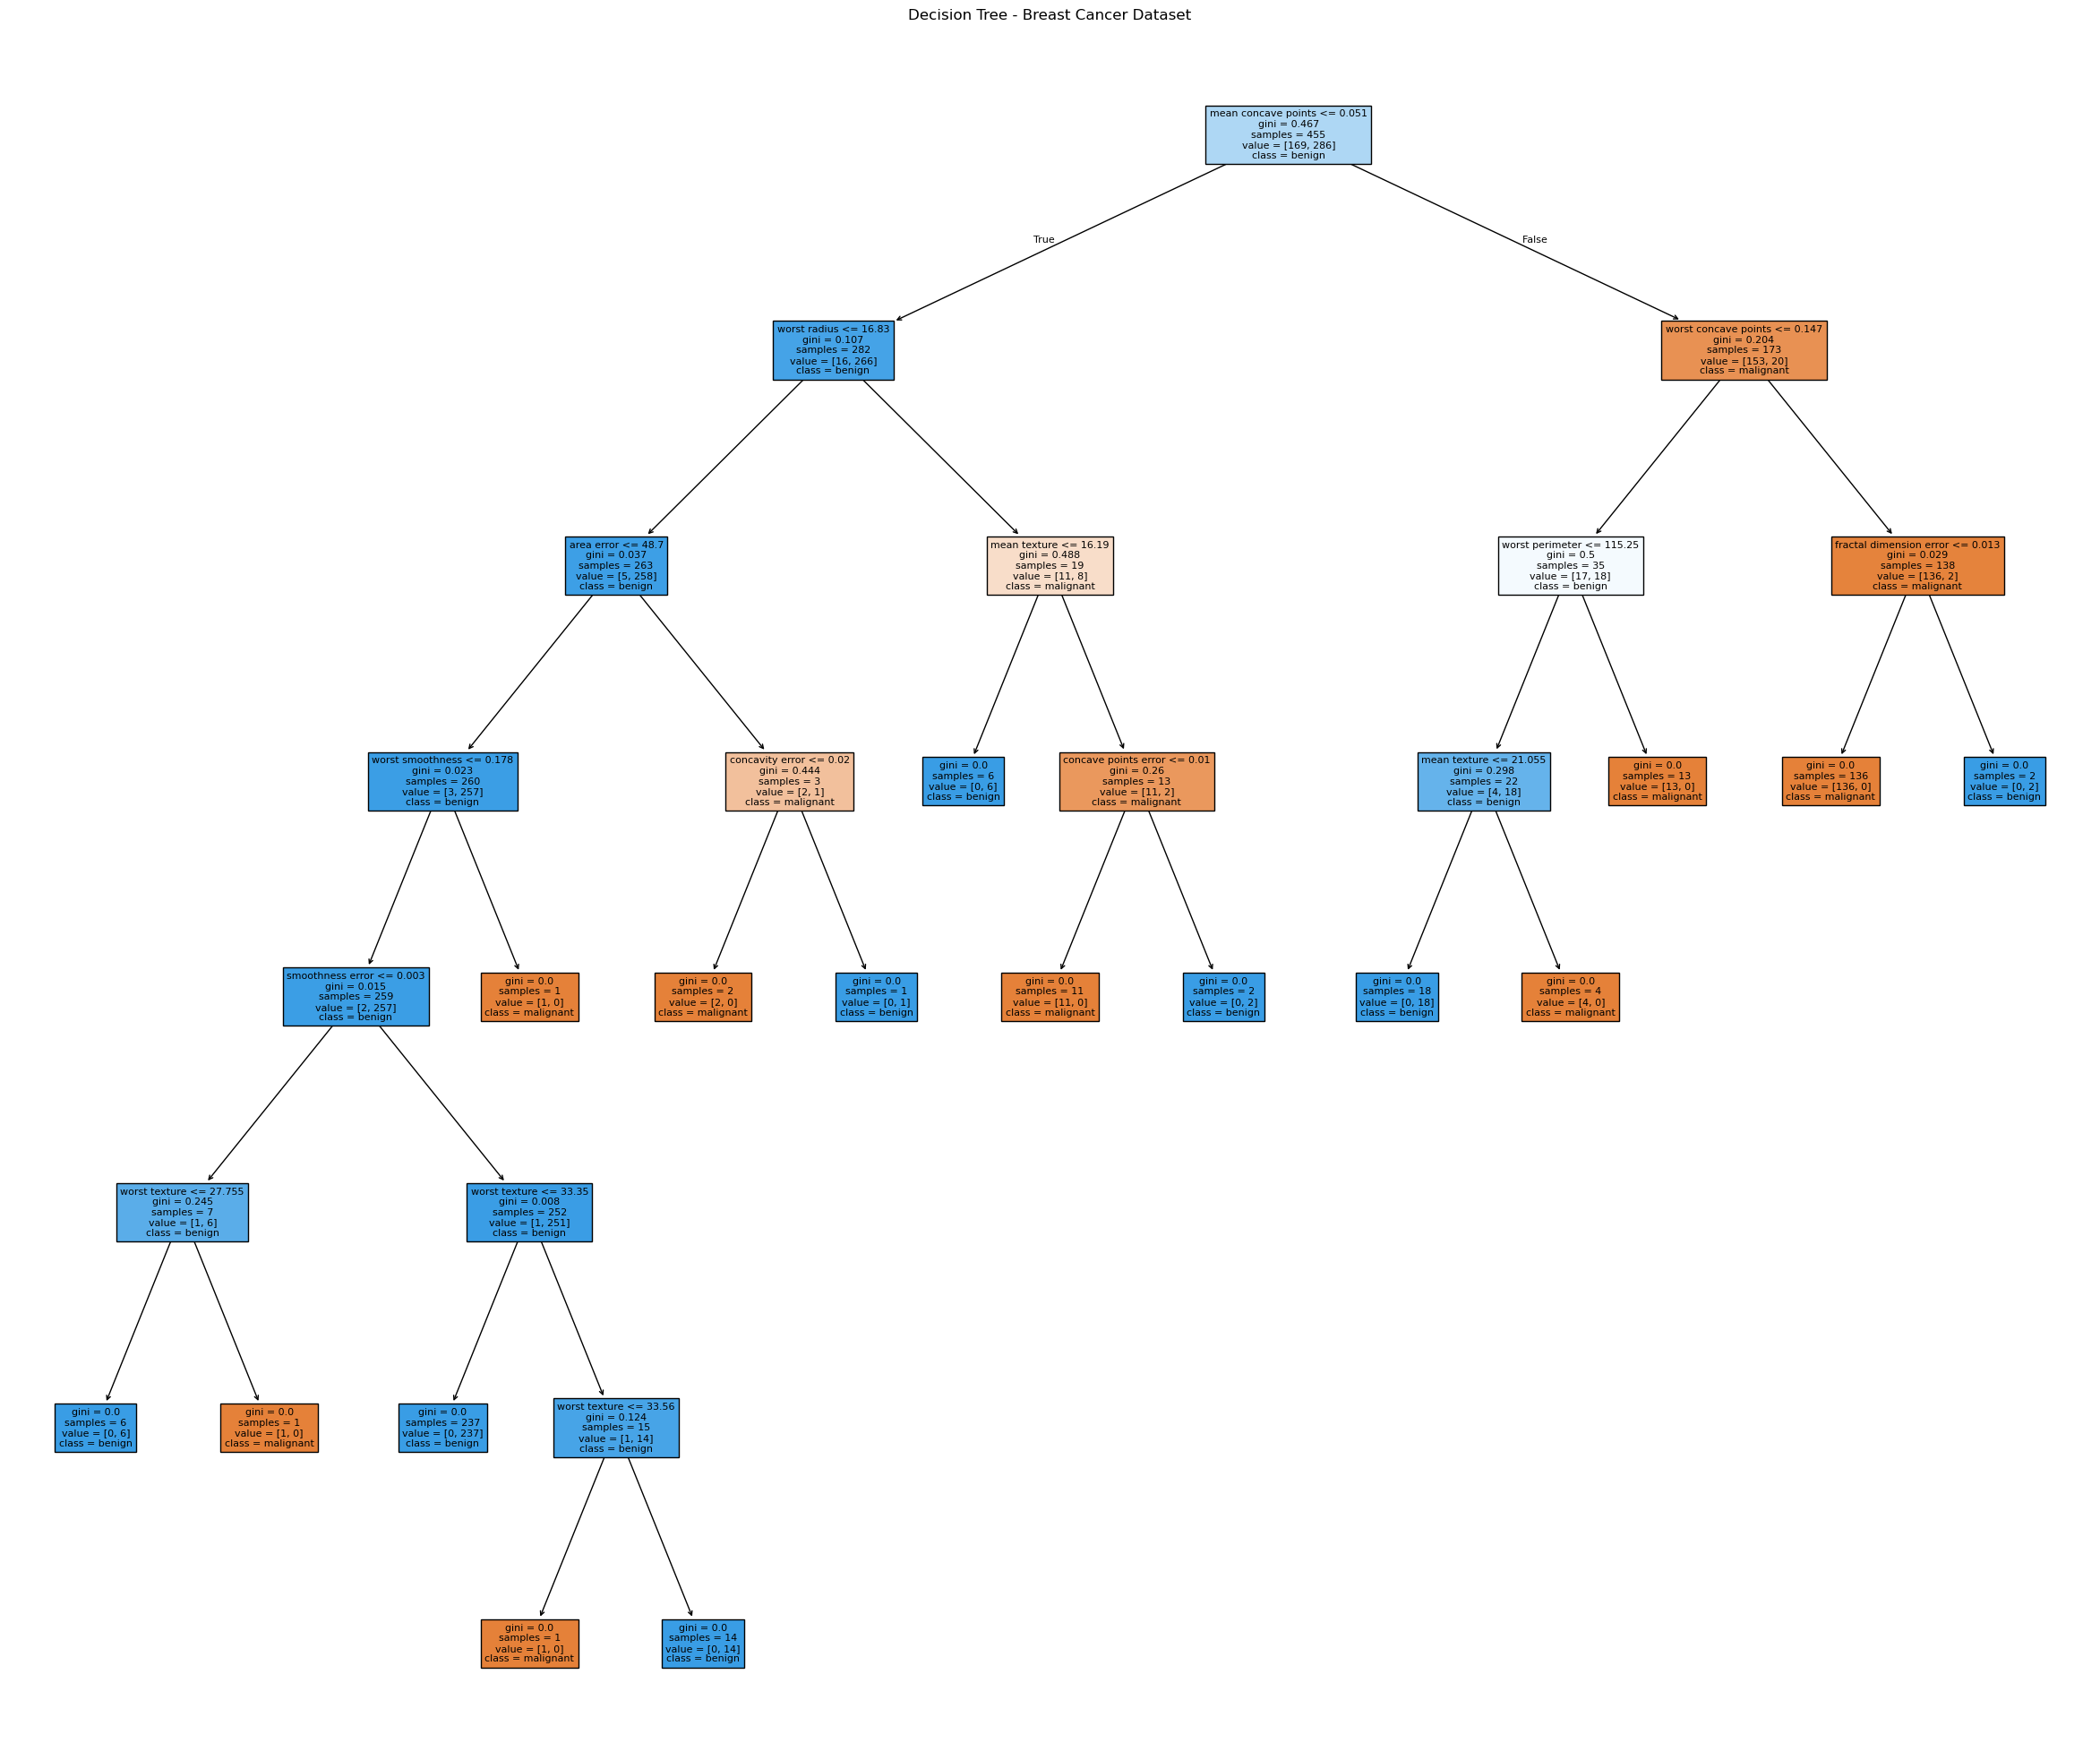

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn import tree 
data = load_breast_cancer() 
 
X = data.data 
y = data.target 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.2, random_state=42) 
clf = DecisionTreeClassifier(random_state=42) 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 
 
accuracy = accuracy_score(y_test, y_pred) 
print(f"Model Accuracy: {accuracy * 100:.2f}%") 
new_sample = np.array([X_test[0]]) 
prediction = clf.predict(new_sample) 
 
prediction_class = "Benign" if prediction == 1 else "Malignant" 
print(f"Predicted Class for the new sample: {prediction_class}") 
 
plt.figure(figsize=(30,25)) 
tree.plot_tree(clf, filled=True, 
feature_names=data.feature_names, class_names=data.target_names) 
plt.title("Decision Tree - Breast Cancer Dataset") 
plt.show()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\achyu\scikit_learn_data
Accuracy: 80.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.33      0.67      0.44         3
           3       1.00      0.00      0.00         5
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4
           8       1.00      0.67      0.80         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.40      1.00      0.57         4
          13       1.00      0.80      0.89         5
          14       1.00      0.40      0.57         5
          15       0.67      1.00

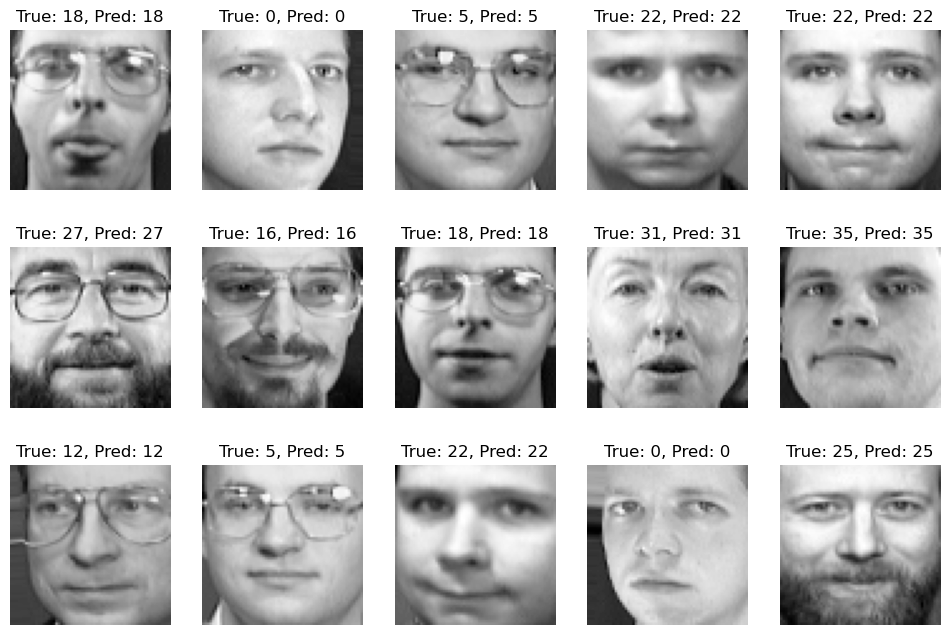

In [13]:
import numpy as np 
from sklearn.datasets import fetch_olivetti_faces 
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
import matplotlib.pyplot as plt 
 
data = fetch_olivetti_faces(shuffle=True, random_state=42) 
X = data.data 
y = data.target 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.3, random_state=42) 
 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
 
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy: {accuracy * 100:.2f}%') 
 
print("\nClassification Report:") 
print(classification_report(y_test, y_pred, zero_division=1)) 
 
print("\nConfusion Matrix:") 
print(confusion_matrix(y_test, y_pred)) 
 
cross_val_accuracy = cross_val_score(gnb, X, y, cv=5, 
scoring='accuracy') 
print(f'\nCross-validation accuracy: {cross_val_accuracy.mean() * 100:.2f}%') 

fig, axes = plt.subplots(3, 5, figsize=(12, 8)) 
for ax, image, label, prediction in zip(axes.ravel(), X_test, 
y_test, y_pred): 
    ax.imshow(image.reshape(64, 64), cmap=plt.cm.gray) 
    ax.set_title(f"True: {label}, Pred: {prediction}") 
    ax.axis('off') 
plt.show()

Confusion Matrix:
[[175  37]
 [ 13 344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       212
           1       0.90      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.92      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



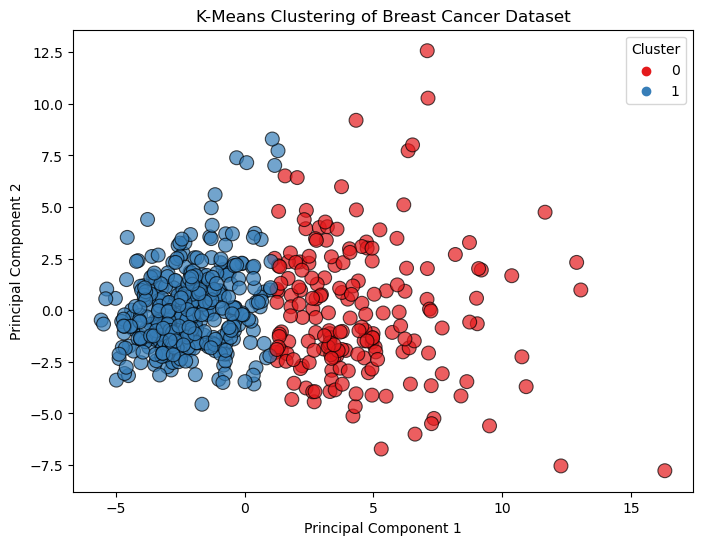

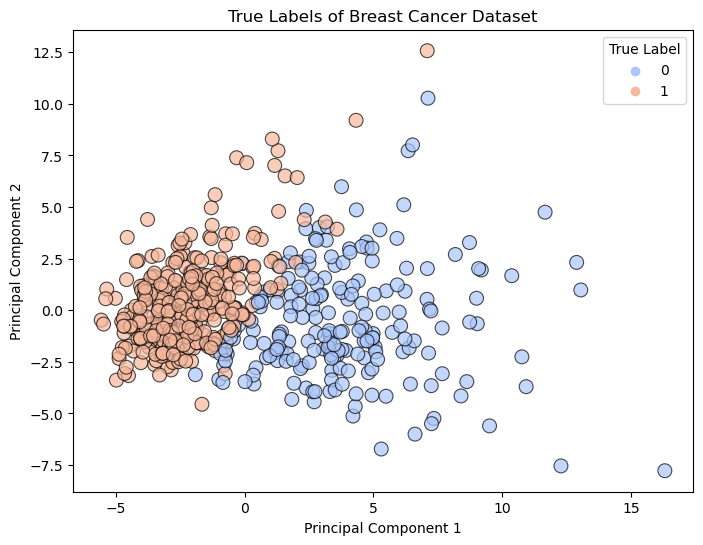

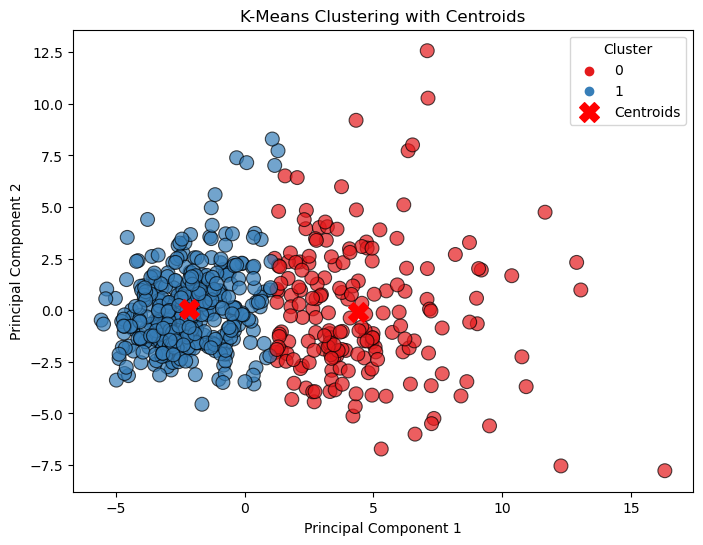

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_breast_cancer 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.metrics import confusion_matrix, classification_report 
 
data = load_breast_cancer() 
X = data.data 
y = data.target 
 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
 
kmeans = KMeans(n_clusters=2, random_state=42) 
y_kmeans = kmeans.fit_predict(X_scaled) 
 
print("Confusion Matrix:") 
print(confusion_matrix(y, y_kmeans)) 
print("\nClassification Report:") 
print(classification_report(y, y_kmeans)) 
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled) 
 
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2']) 
df['Cluster'] = y_kmeans 
df['True Label'] = y 
 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', 
palette='Set1', s=100, edgecolor='black', alpha=0.7) 
plt.title('K-Means Clustering of Breast Cancer Dataset') 
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2') 
plt.legend(title="Cluster") 
plt.show() 
 
plt.figure(figsize=(8, 6)) 
sns.scatterplot(data=df, x='PC1', y='PC2', hue='True Label', 
palette='coolwarm', s=100, edgecolor='black', alpha=0.7) 
plt.title('True Labels of Breast Cancer Dataset') 
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2') 
plt.legend(title="True Label") 
plt.show() 
 
plt.figure(figsize=(8, 6)) 
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', 
palette='Set1', s=100, edgecolor='black', alpha=0.7) 
centers = pca.transform(kmeans.cluster_centers_) 
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', 
marker='X', label='Centroids') 
plt.title('K-Means Clustering with Centroids') 
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2') 
plt.legend(title="Cluster") 
plt.show()